# In this Notebook...
Data Visualization on Cofano Data

In [24]:
with open('/data/container/readme.txt') as f:
    contents = f.read()
    print(contents)

 == Markers + Stacks ==
Define the layout of the yard. All lengths and positions are defined in milimeters for a marker and a stack.
A stack is a specific block on the terminal, and a marker is a place within that stack you can position a container.

Based upon this information we can draw a mark for the yard.

 == Stack entry == 
This is a container placed in a specific stack. A stack entry is placed by a stackcorrection or handling. 
A stack correction is a hard mutation done by someone in the backoffice. A handling is an actual activity done by a crane / stacker / carrier.
All stack entries with a put_mutation and without a pull mutation are currently in the yard.

 == handling == 
Alle movements of containers executed.

 == container location information ==
Shows a bit more information about where a container was or went to. A handling has a from and a to containerlocation information.

 == actions ==
Give information about the container which is transported.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

acti = pd.read_csv('/data/container/actions.csv')
con_loc = pd.read_csv('/data/container/containerlocationinformation.csv')
hand = pd.read_csv('/data/container/handling.csv')
mach = pd.read_csv('/data/container/machine.csv')
mark = pd.read_csv('/data/container/marker.csv')
stack_try = pd.read_csv('/data/container/stackentry.csv')
stacks = pd.read_csv('/data/container/stacks.csv')

/tmp/ipykernel_1153/3980004235.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  hand = pd.read_csv('/data/container/handling.csv')


In [26]:
stacks.head()

,id,name,deletedon,maxheight,maxdepth,maxlength,positionx,positiony,rotation,yard_id,...,rowdepth,infinitespace,yardregion_id,snapwithinmarker,defaultrelativemarkerposition,reversestacksuggestiondirection,opentop,openbottom,openright,openleft
0,10726317,CPS YARD,NaN,8750,3,30500,161540,207200,0,1,...,2438,True,NaN,False,NaN,False,True,True,True,True
1,2350937,716,NaN,8750,1,42700,0,57960,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
2,2350945,717,NaN,8750,1,42700,0,62100,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
3,2350953,718,NaN,8750,1,42700,0,66240,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
4,2350961,719,NaN,8750,1,42700,0,70380,0,1,...,2440,False,NaN,True,C,False,True,True,True,False


In [27]:
#Create dataframes of stacks and 90 degree rotated stacks
stacks0 = stacks[['rotation','positionx','positiony','maxlength']]
stacks90 = stacks[['rotation','positionx','positiony','maxlength']]
stacks0 = stacks0[stacks0['rotation'] == 0]
stacks90 = stacks90[stacks90['rotation'] == 90]
#endlength is the x or y position where max length is added
stacks0['endlength'] = stacks0['positionx'] + stacks0['maxlength']
stacks90['endlength'] = stacks90['positiony'] + stacks90['maxlength']
stacks0['positionx'] = stacks0['positionx']/1000
stacks0['positiony'] = stacks0['positiony']/1000
stacks0['endlength'] = stacks0['endlength']/1000
stacks0['maxlength'] = stacks0['maxlength']/1000
stacks90['positionx'] = stacks90['positionx']/1000
stacks90['positiony'] = stacks90['positiony']/1000
stacks90['endlength'] = stacks90['endlength']/1000
stacks90['maxlength'] = stacks90['maxlength']/1000
stacks90

,rotation,positionx,positiony,maxlength,endlength
107,90,276.83,126.10,36.6,162.70
108,90,320.75,126.10,36.6,162.70
109,90,364.67,126.10,36.6,162.70
110,90,408.59,126.10,36.6,162.70
111,90,452.51,126.10,36.6,162.70
127,90,61.50,205.04,91.5,296.54
128,90,65.64,205.04,91.5,296.54
129,90,69.78,205.04,91.5,296.54
130,90,73.92,205.04,91.5,296.54
131,90,78.06,205.04,91.5,296.54


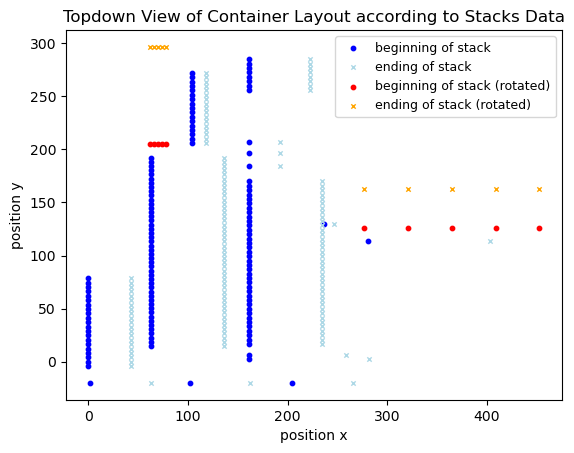

In [28]:
#Plot the 2D layout of the stacks
colors = ['blue', 'red', 'lightblue', 'orange']

plt.title('Topdown View of Container Layout according to Stacks Data')
plt.xlabel('position x')
plt.ylabel('position y')

begin = plt.scatter(stacks0['positionx'],stacks0['positiony'],c=colors[0],marker='o',s=10, linewidths=1)
beginrot = plt.scatter(stacks90['positionx'],stacks90['positiony'],c=colors[1],marker='o',s=10, linewidths=1)
end = plt.scatter(stacks0['endlength'],stacks0['positiony'],c=colors[2],marker='x',s=10, linewidths=1)
endrot = plt.scatter(stacks90['positionx'],stacks90['endlength'],c=colors[3],marker='x',s=10, linewidths=1)

plt.legend((begin, end, beginrot, endrot),
           ('beginning of stack','ending of stack','beginning of stack (rotated)','ending of stack (rotated)'),
           scatterpoints=1,
           loc= 'upper right',
           ncol=1,
           fontsize= 9)
plt.savefig('Stacksdata.png',dpi=300)
plt.show()